In [6]:
import numpy as np
import pandas as pd
data1 = pd.read_csv("C:\\Users\\Maggie Liu\\Desktop\\20Stocks_Revenue.csv")
data2 = pd.read_csv("C:\\Users\\Maggie Liu\\Desktop\\20Stocks_Covariance.csv")
#ER vector
U = np.zeros((20,1))
for i in range(20):
    U[i] = data1['expected_return(bps)'][i]
#Covariance Matrix
Q = np.zeros((20,20))
for i in range(20):
    for j in range(20):
        Q[i,j] = float(2*(data2.iloc[i,j+1]))

In [7]:
#(1) QP minimum variance without constraints on expected revenue
from cvxopt  import solvers, matrix 
P = matrix(Q,tc='d')
q = matrix(np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]), tc='d')
G = matrix(-np.identity(20, dtype=None),tc='d')
h = matrix(np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]), tc='d')
A1 = np.zeros((20,1))
for i in range (20):
    A1[i] = 1.
A = matrix(A1.T,tc='d')
b = matrix([1.0])
sol = solvers.qp(P,q,G,h,A,b)
print(sol['x'])
print(sol['primal objective'])

     pcost       dcost       gap    pres   dres
 0:  1.7057e+02  1.6939e+02  3e+01  5e+00  6e+00
 1:  1.7057e+02  1.6975e+02  3e+00  4e-01  5e-01
 2:  1.7128e+02  1.7195e+02  2e+00  2e-01  3e-01
 3:  1.8308e+02  1.7419e+02  2e+01  1e-01  2e-01
 4:  1.9103e+02  1.7247e+02  3e+01  4e-02  6e-02
 5:  1.8462e+02  1.7300e+02  1e+01  2e-16  6e-13
 6:  1.8102e+02  1.7841e+02  3e+00  9e-17  2e-13
 7:  1.7988e+02  1.7964e+02  2e-01  5e-17  2e-13
 8:  1.7974e+02  1.7973e+02  1e-02  5e-17  2e-13
 9:  1.7974e+02  1.7974e+02  1e-04  2e-16  3e-13
Optimal solution found.
[ 2.38e-02]
[ 2.13e-02]
[ 6.58e-02]
[ 5.53e-02]
[ 2.77e-02]
[ 1.05e-02]
[ 5.43e-03]
[ 2.50e-08]
[ 1.33e-08]
[ 1.03e-01]
[ 1.29e-08]
[ 8.89e-02]
[ 1.78e-02]
[ 3.02e-06]
[ 1.56e-08]
[ 1.03e-01]
[ 4.17e-08]
[ 3.95e-01]
[ 5.75e-09]
[ 8.30e-02]

179.73514792432843


In [4]:
print(np.dot(sol['x'].T,U))

[[17.69245398]]


     pcost       dcost       gap    pres   dres
 0:  1.7083e+02  1.7199e+02  6e+01  5e-01  2e+02
 1:  1.7244e+02  1.7166e+02  4e+00  2e-02  9e+00
 2:  1.7261e+02  1.7265e+02  3e+00  2e-02  6e+00
 3:  1.7383e+02  1.7457e+02  2e+00  7e-03  3e+00
 4:  1.7601e+02  1.7727e+02  4e+00  5e-03  2e+00
 5:  1.8002e+02  1.7898e+02  2e+00  7e-04  3e-01
 6:  1.8006e+02  1.7904e+02  2e+00  4e-04  1e-01
 7:  1.7978e+02  1.7971e+02  8e-02  1e-05  4e-03
 8:  1.7974e+02  1.7973e+02  1e-03  1e-07  4e-05
 9:  1.7974e+02  1.7974e+02  1e-05  1e-09  4e-07
10:  1.7974e+02  1.7974e+02  1e-07  1e-11  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7427e+02  1.9166e+02  1e+02  1e+00  2e+02
 1:  2.0150e+02  1.9846e+02  8e+00  3e-02  5e+00
 2:  2.0085e+02  1.9913e+02  6e+00  2e-02  3e+00
 3:  2.0561e+02  2.0182e+02  8e+00  5e-03  1e+00
 4:  2.0896e+02  2.0085e+02  1e+01  1e-03  3e-01
 5:  2.0505e+02  2.0384e+02  1e+00  3e-16  6e-12
 6:  2.0431e+02  2.0426e+02  5e-02  5e-16  2e-1

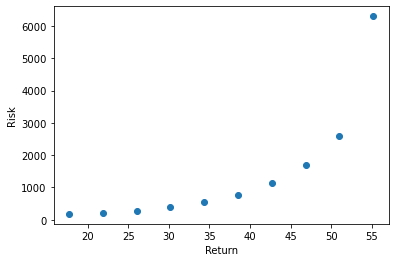

In [74]:
import matplotlib.pyplot as plt
P = matrix(Q,tc='d')
q = matrix(np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]), tc='d')
Aeq1 = np.zeros((20,1))
for i in range (20):
    Aeq1[i] = 1.
A = matrix(Aeq1.T,tc='d')
b = matrix([1.0])
A1 = -np.identity(20, dtype=None)
A2 = -U.T
A12 = np.r_[A1,A2]
G=matrix(A12)
risk = []
eu = []
for u in np.linspace(17.69,55.2,10):
    eu.append(u)
    h = matrix(np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-u]))
    sol = solvers.qp(P,q,G,h,A,b)
    risk.append(sol['primal objective'])
print(eu,risk)
plt.scatter(eu,risk)
plt.xlabel('Return')
plt.ylabel('Risk')
plt.savefig('./test.jpg')
plt.show()

In [8]:
# import matplotlib.pyplot as plt
P = matrix(Q,tc='d')
q = matrix(np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]), tc='d')
Aeq1 = np.zeros((20,1))
for i in range (20):
    Aeq1[i] = 1.
A = matrix(Aeq1.T,tc='d')
b = matrix([1.0])
A1 = -np.identity(20, dtype=None)
A2 = -U.T
A12 = np.r_[A1,A2]
G=matrix(A12)
risk = []
eu = []
for u in [30]:
    eu.append(u)
    h = matrix(np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-u]))
    sol = solvers.qp(P,q,G,h,A,b)
    risk.append(sol['primal objective'])
print(eu,risk)


     pcost       dcost       gap    pres   dres
 0:  1.9248e+02  2.8294e+02  3e+02  2e+00  2e+02
 1:  3.6892e+02  3.4085e+02  4e+01  3e-02  4e+00
 2:  3.5689e+02  3.4253e+02  2e+01  2e-02  2e+00
 3:  4.0687e+02  3.4566e+02  1e+02  1e-02  2e+00
 4:  4.4546e+02  3.2235e+02  2e+02  1e-02  1e+00
 5:  4.1865e+02  3.3737e+02  1e+02  2e-03  3e-01
 6:  3.8333e+02  3.7062e+02  1e+01  2e-16  3e-11
 7:  3.7486e+02  3.7383e+02  1e+00  1e-16  6e-11
 8:  3.7419e+02  3.7417e+02  2e-02  2e-16  1e-10
 9:  3.7418e+02  3.7418e+02  2e-04  2e-16  1e-10
Optimal solution found.
[30] [374.1793050350123]


In [ ]:
P = matrix(Q,tc='d')
q = matrix(np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]), tc='d')
Aeq1 = np.zeros((20,1))
for i in range (20):
    Aeq1[i] = 1.
A = matrix(Aeq1.T,tc='d')
b = matrix([1.0])
A1 = -np.identity(20, dtype=None)
A2 = -U.T
A12 = np.r_[A1,A2]
G=matrix(A12)
risk = []
eu = []
for u in np.linspace(17.69,55.2,10):
    eu.append(u)
    h = matrix(np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-30.]))
    sol = solvers.qp(P,q,G,h,A,b)
    risk.append(sol['primal objective'])